In [43]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# for visualistically representing the data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import datetime
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [45]:
#auth = InteractiveLoginAuthentication()

In [46]:
data_cleaned = df.dropna()

print(df.isnull().sum())

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64


In [47]:
# Drop specific columns
columns_to_drop = ['View Rating', 'Writer', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site', 'Summary', 'Netflix Link', 'Production House', 'Metacritic Score']  # Replace with the actual column names to be dropped
data = df.drop(columns=columns_to_drop)

# Calculate the mean value of the column
mean_value = data['Rotten Tomatoes Score'].mean()

# Replace null values with the mean
data['Rotten Tomatoes Score'] = data['Rotten Tomatoes Score'].fillna(mean_value)

# Fill missing values with zero
data['Boxoffice'] = data['Boxoffice'].fillna(0)
data['Awards Received'] = data['Awards Received'].fillna(0)
data['Awards Nominated For'] = data['Awards Nominated For'].fillna(0)

# Check the updated DataFrame
print(data[['Awards Received', 'Awards Nominated For']].isnull().sum())

Awards Received         0
Awards Nominated For    0
dtype: int64


In [48]:
null_values = data.dropna()
#null_values = data.isnull();
#data.drop(null_values);

print(null_values.isnull().sum())

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Actors                   0
IMDb Score               0
Rotten Tomatoes Score    0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
IMDb Link                0
IMDb Votes               0
dtype: int64


In [49]:
df.head(10);

In [50]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

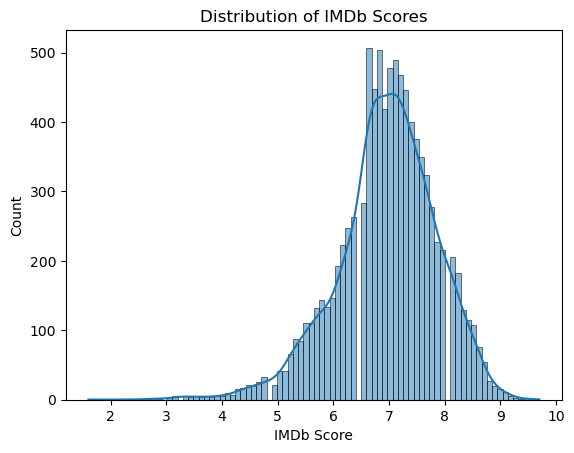

In [51]:
import seaborn as sns

sns.histplot(data=data, x='IMDb Score', kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()


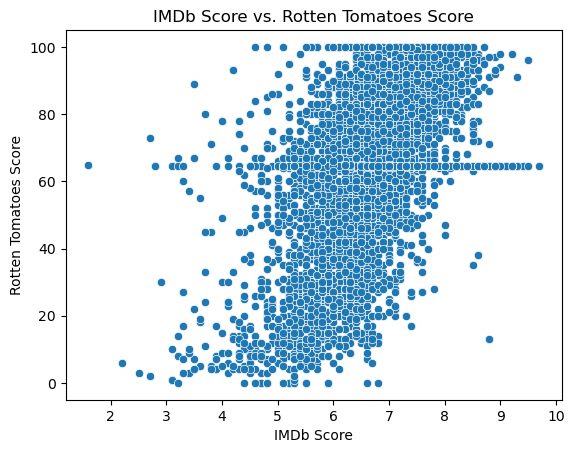

In [52]:
sns.scatterplot(data=data, x='IMDb Score', y='Rotten Tomatoes Score')
plt.title('IMDb Score vs. Rotten Tomatoes Score')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.show()


#The above series shows United states have the most missing values in directors

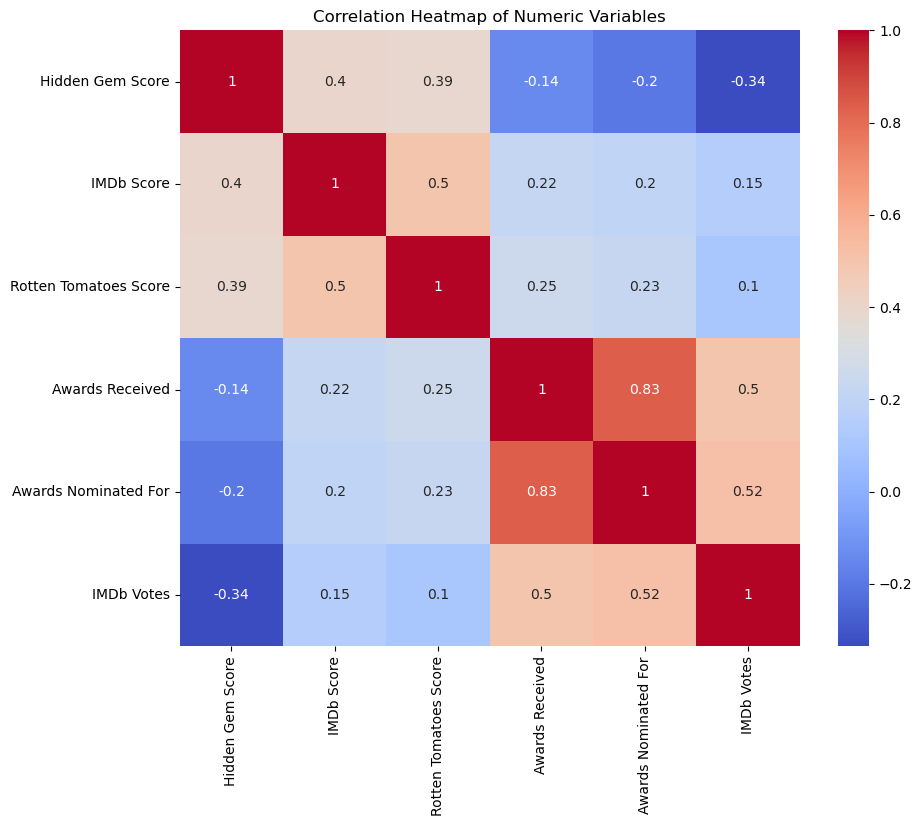

In [53]:
numeric_columns = ['Hidden Gem Score', 'Runtime', 'IMDb Score', 'Rotten Tomatoes Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


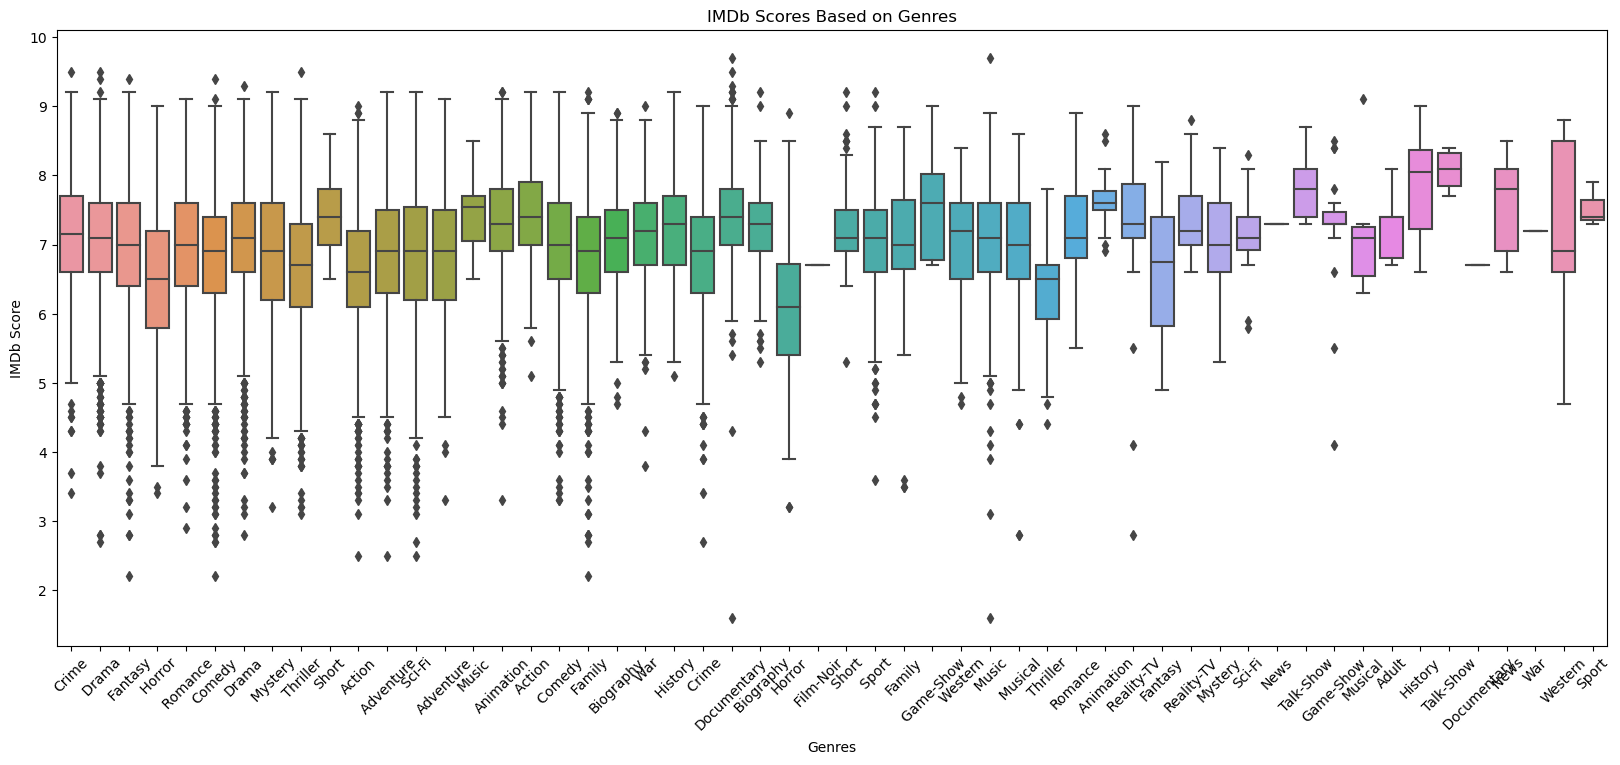

In [54]:

# Split the genres column into a list of genres
data['Genres'] = data['Genre'].str.split(',')

# Create a new DataFrame with each genre and its corresponding IMDb scores
genre_scores = data.explode('Genres')[['Genres', 'IMDb Score']]

# Set the figure size
plt.figure(figsize=(20, 8))

# Plot the boxplot
sns.boxplot(data=genre_scores, x='Genres', y='IMDb Score')
plt.title('IMDb Scores Based on Genres')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)

# Show the plot
plt.show()


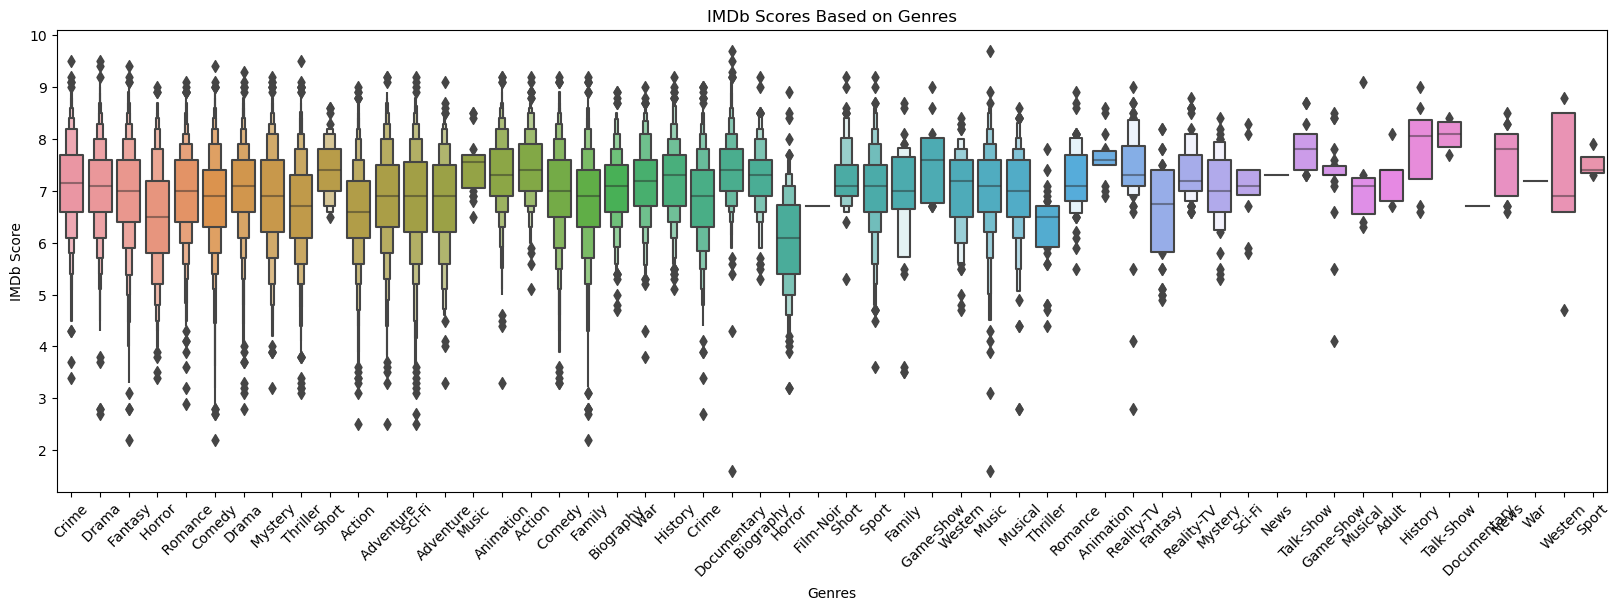

In [55]:
plt.figure(figsize=(20, 6))
sns.boxenplot(data=genre_scores, x='Genres', y='IMDb Score')
plt.title('IMDb Scores Based on Genres')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()


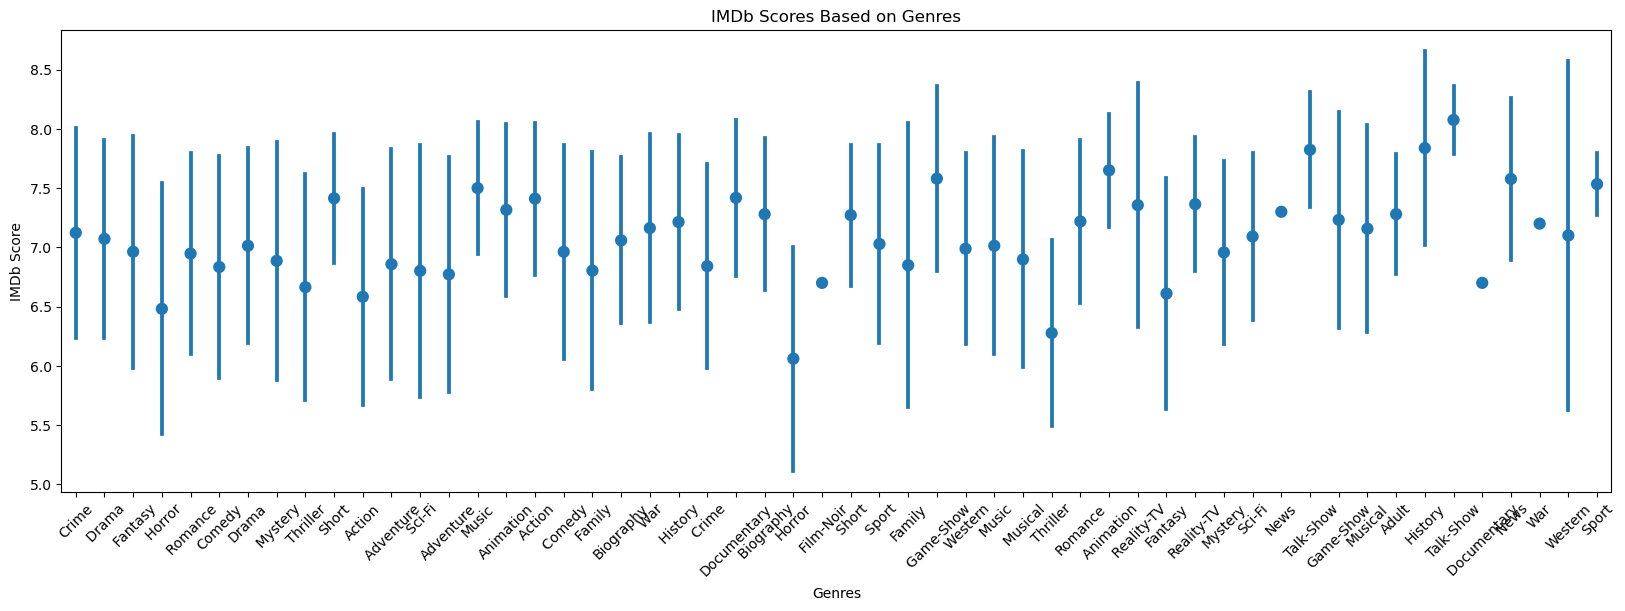

In [56]:
plt.figure(figsize=(20, 6))
sns.pointplot(data=genre_scores, x='Genres', y='IMDb Score', ci='sd', linestyles='')
plt.title('IMDb Scores Based on Genres')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()


In [57]:
data['Actors'] = data['Actors'].str.split(', ')
data['Total Shows'] = data.groupby('Actors')['show_id'].transform('count')
data['Total Shows'] = data['Total Shows'].fillna(0)

top_actors = data.groupby('Actors')['Total Shows'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors with the Most Netflix Shows')
plt.xlabel('Total Shows')
plt.ylabel('Actor')
plt.show()


KeyError: 'Column not found: show_id'

In [ ]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the violin plot
sns.violinplot(data=data, x='Country', y='Runtime')
plt.title('Runtime Distribution by Country Availability')
plt.xlabel('Country Availability')
plt.ylabel('Runtime')

# Show the plot
plt.show()


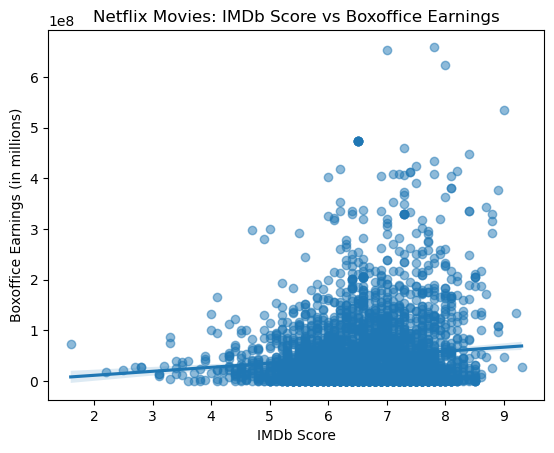

In [58]:
# Filter the DataFrame for movies
movies = df[df['Series or Movie'] == 'Movie']

# Filter out movies with missing IMDb Score or Boxoffice earnings
movies = movies.dropna(subset=['IMDb Score', 'Boxoffice'])

# Convert IMDb Score to numeric
movies['IMDb Score'] = movies['IMDb Score'].astype(float)

# Convert Boxoffice to string format and extract numeric values
movies['Boxoffice'] = movies['Boxoffice'].astype(str).str.extract('(\d+)', expand=False).astype(float)

# Create a regplot of IMDb Score vs Boxoffice earnings
sns.regplot(x=movies['IMDb Score'], y=movies['Boxoffice'], scatter_kws={'alpha': 0.5})

# Add labels and title
plt.xlabel('IMDb Score')
plt.ylabel('Boxoffice Earnings (in millions)')
plt.title('Netflix Movies: IMDb Score vs Boxoffice Earnings')

# Display the plot
plt.show()

In [60]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

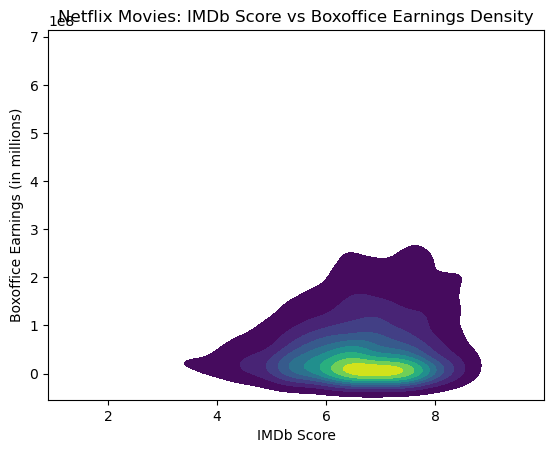

In [62]:
# Filter the DataFrame for movies
movies = df[df['Series or Movie'] == 'Movie']

# Filter out movies with missing IMDb Score or Boxoffice earnings
movies = movies.dropna(subset=['IMDb Score', 'Boxoffice'])

# Convert IMDb Score to numeric
movies['IMDb Score'] = movies['IMDb Score'].astype(float)

# Convert Boxoffice to string format
movies['Boxoffice'] = movies['Boxoffice'].astype(str)

# Extract numeric values from Boxoffice
movies['Boxoffice'] = movies['Boxoffice'].str.extract('(\d+)', expand=False).astype(float)

# Create a density plot of IMDb Score vs Boxoffice earnings
sns.kdeplot(data=movies, x='IMDb Score', y='Boxoffice', cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('IMDb Score')
plt.ylabel('Boxoffice Earnings (in millions)')
plt.title('Netflix Movies: IMDb Score vs Boxoffice Earnings Density')

# Display the plot
plt.show()

#The density plot shows that the majority of Netflix movies have IMDb scores between 6 and 8. This suggests that Netflix tends 
#to offer movies with relatively high ratings, as indicated by the peak in density within this range.
#The density plot highlights a higher concentration of movies with moderate IMDb scores (around 6 to 7) and moderate Boxoffice 
#earnings (in the range of a few million to tens of millions). This suggests that Netflix focuses on a broad range of movies 
#that cater to different audience preferences and financial outcomes.
#The density plot also shows a positive correlation between IMDb scores and Boxoffice earnings. As the IMDb scores increase, 
#the density of movies with higher Boxoffice earnings also increases. This indicates that movies with better ratings tend to 
#have higher box office performance.

#The density plot exhibits some outliers with extremely high IMDb scores and Boxoffice earnings. These outliers represent 
#exceptional movies that have achieved both critical acclaim and commercial success, potentially becoming blockbuster hits.